In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd. read_csv('insurance_claims_cleaned_fixed.csv')

We will look at incident Type, Incident Severity, and Collision Type

In [2]:
df.groupby('incident_type')['fraud_reported'].value_counts()

incident_type             fraud_reported
Multi-vehicle Collision   No                305
                          Yes               114
Parked Car                No                 76
                          Yes                 8
Single Vehicle Collision  No                286
                          Yes               117
Vehicle Theft             No                 86
                          Yes                 8
Name: count, dtype: int64

In [3]:
df.groupby('incident_type')['fraud_reported'].value_counts(normalize = True)


incident_type             fraud_reported
Multi-vehicle Collision   No                0.727924
                          Yes               0.272076
Parked Car                No                0.904762
                          Yes               0.095238
Single Vehicle Collision  No                0.709677
                          Yes               0.290323
Vehicle Theft             No                0.914894
                          Yes               0.085106
Name: proportion, dtype: float64

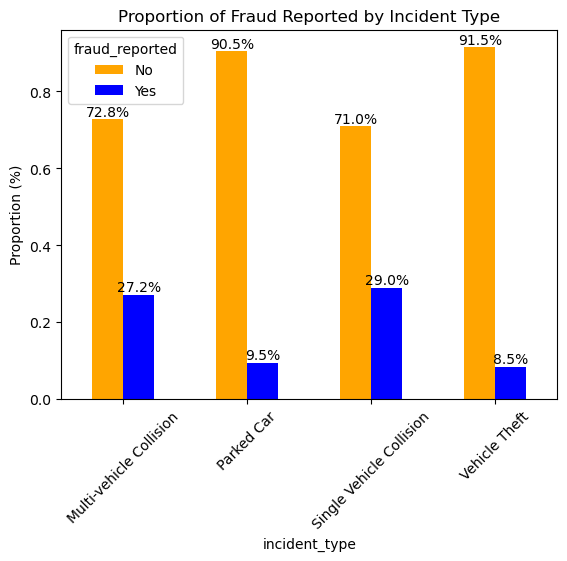

In [ ]:
# Visualize proportion of fraud reported by incident type
proportions = df.groupby('incident_type')['fraud_reported'].value_counts(normalize=True).unstack()
ax = proportions.plot(kind='bar', stacked=False, color=['blue', 'orange'])

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percent = f'{height*100:.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.ylabel('Proportion (%)')
plt.title('Proportion of Fraud Reported by Incident Type')
plt.xticks(rotation=45)
plt.show()

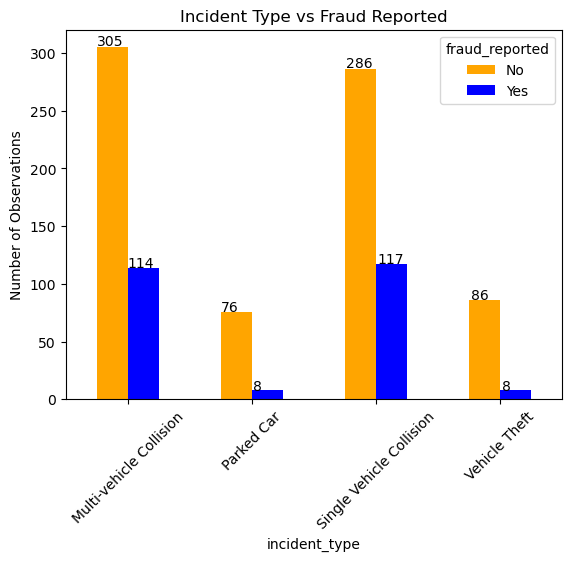

In [ ]:
#lets visualize collision type vs fraud reported
ax = df.groupby('incident_type')['fraud_reported'].value_counts().unstack().plot(kind = 'bar', stacked = False, color=['blue', 'orange'])
#add number of observations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel('Number of Observations')
plt.title('Incident Type vs Fraud Reported')

plt.xticks(rotation=45)
plt.show()



Key insights:

Collisions (especially single vehicle) have much higher fraud rates.
Parked car and vehicle theft claims are much less likely to be fraudulent.

Multi-vehicle Collision: 27.2% fraud rate

Single Vehicle Collision: 29.0% fraud rate


In [6]:
#Now lets take a look at incident severity, to see how they affect fraud reported
df.groupby('incident_severity')['fraud_reported'].value_counts(normalize=True)

incident_severity  fraud_reported
Major Damage       Yes               0.605072
                   No                0.394928
Minor Damage       No                0.892655
                   Yes               0.107345
Total Loss         No                0.871429
                   Yes               0.128571
Trivial Damage     No                0.933333
                   Yes               0.066667
Name: proportion, dtype: float64

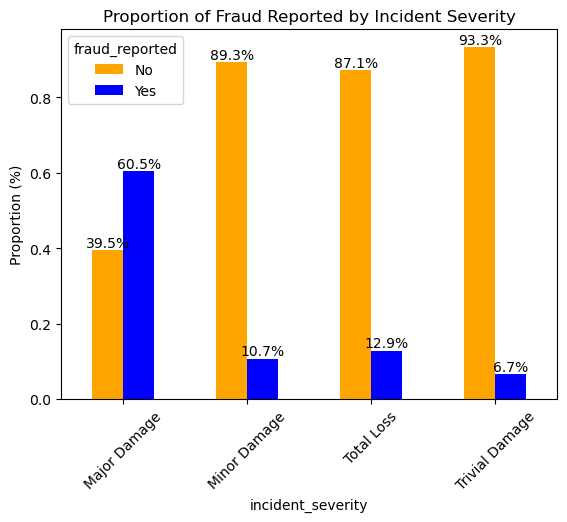

In [18]:
# Visualize proportion of fraud reported by incident severity
proportions = df.groupby('incident_severity')['fraud_reported'].value_counts(normalize=True).unstack()
ax = proportions.plot(kind='bar', stacked=False, color=['orange', 'blue'])

# Annotate each bar with percentage
for p in ax.patches:
    height = p.get_height()
    percent = f'{height*100:.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')

plt.ylabel('Proportion (%)')
plt.title('Proportion of Fraud Reported by Incident Severity')
plt.xticks(rotation=45)
plt.show()

In [9]:
counts = df.groupby('incident_severity')['fraud_reported'].value_counts()
print(counts)

incident_severity  fraud_reported
Major Damage       Yes               167
                   No                109
Minor Damage       No                316
                   Yes                38
Total Loss         No                244
                   Yes                36
Trivial Damage     No                 84
                   Yes                 6
Name: count, dtype: int64


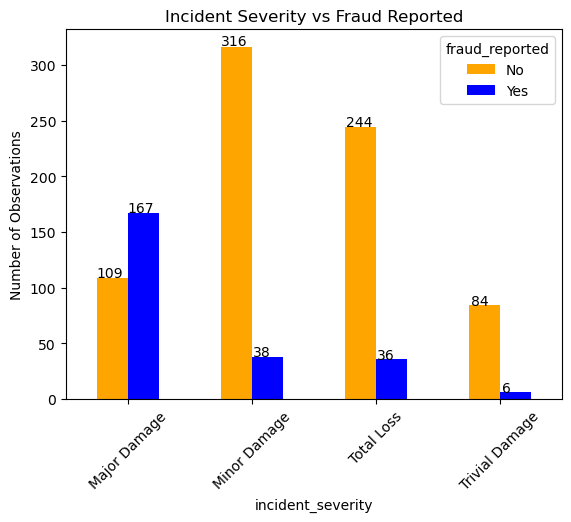

In [19]:
#lets visualize collision type vs fraud reported
ax = df.groupby('incident_severity')['fraud_reported'].value_counts().unstack().plot(kind = 'bar', stacked = False, color=['orange', 'blue'])
#add number of observations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel('Number of Observations')
plt.title('Incident Severity vs Fraud Reported')

plt.xticks(rotation=45)
plt.show()

The analysis reveals that Major Damage claims have an exceptionally high 60.5% fraud rate, making them the most critical risk factor for fraud detection.

This finding is particularly significant because:

Major Damage claims are 5.6 times more likely to be fraudulent than Minor Damage claims
Major Damage represents the highest value claims, so focusing detection efforts here maximizes impact
The stark difference (60.5% vs ~10% for other categories) suggests potential organized fraud targeting high-value claims

In [21]:
df.groupby ('fraud_reported')['collision_type'].value_counts(normalize=True)

fraud_reported  collision_type 
No              Side Collision     0.273572
                Rear Collision     0.266932
                Front Collision    0.244356
                Unknown            0.215139
Yes             Rear Collision     0.368421
                Front Collision    0.283401
                Side Collision     0.283401
                Unknown            0.064777
Name: proportion, dtype: float64

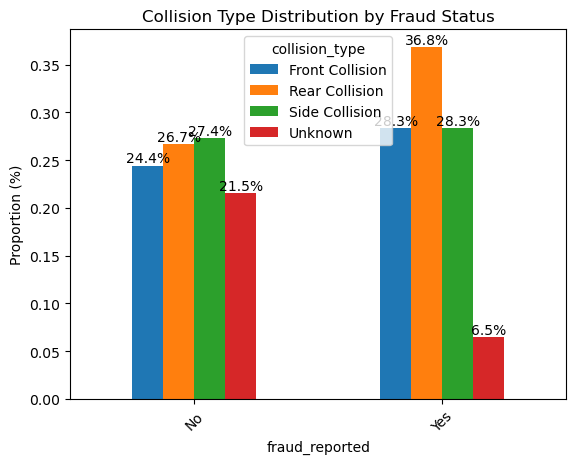

In [29]:
proportions = df.groupby('fraud_reported')['collision_type'].value_counts(normalize = True).unstack()
ax = proportions.plot(kind = 'bar', stacked = False)
for p in ax.patches:
    height = p.get_height()
    percent = f'{height*100:.1f}%'
    ax.annotate(percent, (p.get_x() + p.get_width()/2, height), ha='center', va='bottom')
plt.ylabel('Proportion (%)')
plt.title('Collision Type Distribution by Fraud Status')
plt.xticks(rotation=45)
plt.show()


In [27]:
counts = df.groupby('fraud_reported')['incident_severity'].value_counts()
print(counts)

fraud_reported  incident_severity
No              Minor Damage         316
                Total Loss           244
                Major Damage         109
                Trivial Damage        84
Yes             Major Damage         167
                Minor Damage          38
                Total Loss            36
                Trivial Damage         6
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

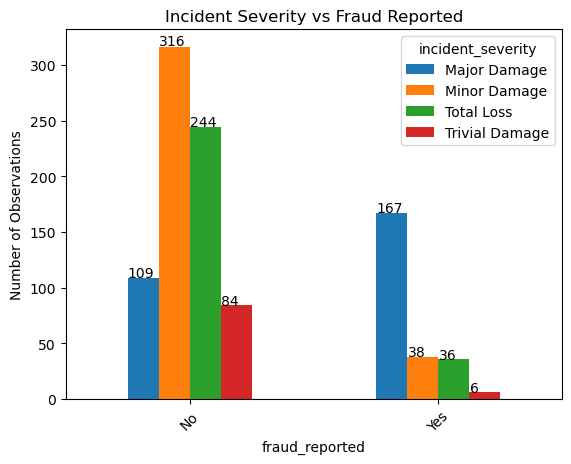

In [31]:
plt.figure(figsize=(10,6))
ax = df.groupby('fraud_reported')['incident_severity'].value_counts().unstack().plot(kind = 'bar',stacked = False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel('Number of Observations')
plt.title('Incident Severity vs Fraud Reported')
plt.xticks(rotation=45)
plt.show()

High Risk: Rear collision claims should receive extra scrutiny as they're 38% more likely to be in fraudulent cases
Low Risk: Claims with "Unknown" collision types are much less likely to be fraudulent
Moderate Risk: Front and side collisions show relatively balanced distributions between fraud and non-fraud cases
This pattern suggests that fraudsters may prefer rear collision scenarios, possibly because they're easier to stage or provide better opportunities for exaggerated claims.

🔍 Complete EDA Analysis Summary
Based on my entire incident characteristics analysis, here's the comprehensive picture:

📋 What I Analyzed:
My EDA systematically examined fraud patterns across three critical dimensions:

Incident Types (collisions, theft, parked car)
Incident Severity (trivial to major damage)
Collision Types (front, rear, side, unknown)
🎯 Most Critical Discovery:
Major Damage claims have a 60.5% fraud rate - this is the smoking gun. It's 6x higher than other severity levels and represents the clearest fraud indicator in your dataset.